In [381]:
import numpy as np
import os
import glob
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

curr = os.getcwd()
extension = 'csv'

paths = [os.path.join(curr,"data/SIN-MAA"), os.path.join(curr,"data/SIN-BLR"), os.path.join(curr,"data/SIN-DEL")]
all_df = pd.DataFrame()
for path in paths:
    os.chdir(path)
    filenames = [i for i in glob.glob('*.{}'.format(extension))]
#   print(filenames)
    dfs = pd.concat([pd.read_csv(f, parse_dates=['travel_date'], dayfirst=True) for f in filenames ], ignore_index=True)
    all_df = pd.concat([all_df, dfs])
os.chdir(curr)
# print(all_df.sample(10))

In [382]:
df_query = all_df.copy()
df_query.query('carrier == "Singapore Airlines" and days_before_travel == 14 and destination == "MAA"')

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
1707,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,14.0,972
2217,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-02,14.0,972
2718,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-03,14.0,972
3218,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-04,14.0,972


In [383]:
df = all_df.copy()
df.reset_index(inplace=True, drop=True)
df = df.drop(df[df.price == 'Price unavailable' ].index)
print(df.columns)
print(df.shape)
print(df.carrier.unique())
print(df.source.unique())
print(df.destination.unique())

Index(['carrier', 'departure_time', 'stops', 'source', 'destination',
       'itinerary_type', 'travel_date', 'days_before_travel', 'price'],
      dtype='object')
(6891, 9)
['IndiGo' 'Scoot' 'Silkair' 'Singapore Airlines' 'Air-India Express'
 'Air India' 'Vistara']
['SIN']
['MAA' 'BLR' 'DEL']


In [384]:
df_query = df.copy()
df_query.query('carrier == "Singapore Airlines" and days_before_travel == 14 and destination == "MAA"')

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
1707,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,14.0,972
2217,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-02,14.0,972
2718,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-03,14.0,972
3218,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-04,14.0,972


In [385]:
df.isnull().sum()

carrier               0
departure_time        0
stops                 0
source                0
destination           0
itinerary_type        0
travel_date           0
days_before_travel    0
price                 0
dtype: int64

In [386]:
df_duplicate = df[df.duplicated()]
df_duplicate

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price


In [387]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace(',', ''))
    return(x)
df['price'] = df['price'].apply(clean_currency).astype('float')

In [388]:
df.sample(5)

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
2438,Silkair,07:40,Non-stop,SIN,MAA,one-way,2020-06-12,55.0,496.0
1373,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-06-02,47.0,496.0
2430,Air India,09:00,Non-stop,SIN,MAA,one-way,2020-06-11,54.0,205.0
4066,Singapore Airlines,20:05,Non-stop,SIN,BLR,one-way,2020-05-12,27.0,1002.0
6267,Singapore Airlines,02:35,Non-stop,SIN,DEL,one-way,2020-07-01,77.0,582.0


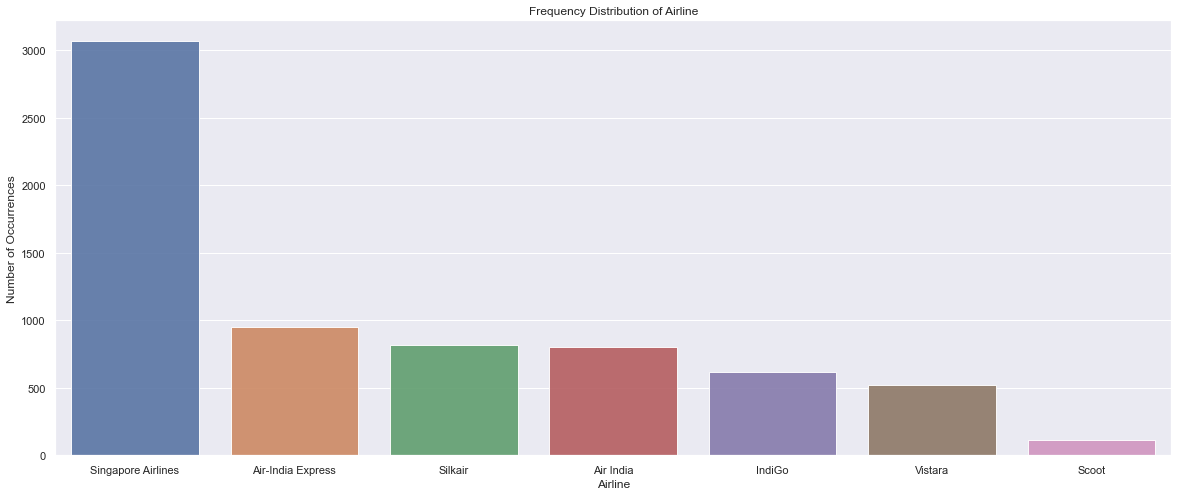

In [389]:
plt.figure(figsize=(20, 8))
airline_count = df['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(airline_count.index, airline_count.values, alpha=0.9)
plt.title('Frequency Distribution of Airline')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.show()

In [390]:
df_query = df.copy()
df_query.query('carrier == "Singapore Airlines" and days_before_travel == 14 and destination == "MAA"')

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
1707,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,14.0,972.0
2217,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-02,14.0,972.0
2718,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-03,14.0,972.0
3218,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-04,14.0,972.0


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6891 entries, 0 to 8364
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   carrier             6891 non-null   object        
 1   departure_time      6891 non-null   object        
 2   stops               6891 non-null   object        
 3   source              6891 non-null   object        
 4   destination         6891 non-null   object        
 5   itinerary_type      6891 non-null   object        
 6   travel_date         6891 non-null   datetime64[ns]
 7   days_before_travel  6891 non-null   float64       
 8   price               6891 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 538.4+ KB


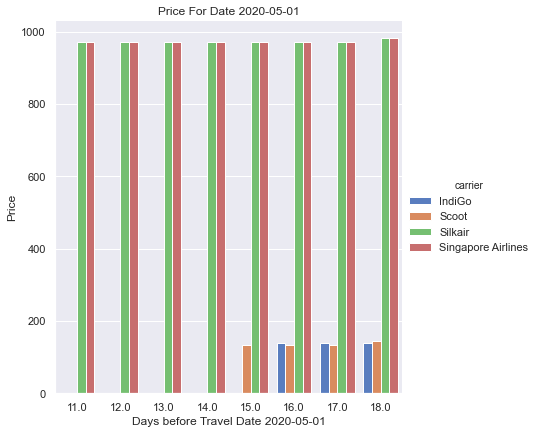

In [392]:
date = datetime.datetime.strptime("2020-05-01", '%Y-%m-%d')
destination = 'MAA'
filter_df = df[(df['travel_date'] == date) & (df['destination'] == destination)]
s = sns.catplot(x="days_before_travel", y="price", hue="carrier", data=filter_df,
                height=6, kind="bar", palette="muted")
plt.title('Price For Date {}'.format(date.date()))
plt.ylabel('Price', fontsize=12)
plt.xlabel('Days before Travel Date {}'.format(date.date()), fontsize=12)
plt.show()

In [393]:
df_encoded = df.copy()
replace_map = {'carrier': {'Singapore Airlines': 1, 'IndiGo': 2, 'Air-India Express': 3, 'Silkair': 4,
                                  'Air India': 5, 'Scoot': 6, 'Vistara': 7}, 'stops': {'Non-stop': 1}, 'source': {'SIN': 1}, 
                                'destination': {'MAA': 1, 'BLR': 2, 'DEL': 3}, 'itinerary_type': {'one-way': 1}}
df_encoded.replace(replace_map, inplace=True)
df_encoded.sample(5)

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
4245,1,20:05,1,1,2,1,2020-06-28,74.0,564.0
1971,3,00:10,1,1,1,1,2020-06-17,61.0,168.0
6199,2,23:25,1,1,3,1,2020-06-18,64.0,269.0
979,4,7:40,1,1,1,1,2020-06-21,67.0,496.0
5479,4,09:05,1,1,2,1,2020-06-12,54.0,564.0


In [394]:
df_split = df_encoded.copy()
df_split[["travel_year","travel_month","travel_day"]] = df_split["travel_date"].astype(str).str.split("-", expand=True).astype(int)
df_split[["departure_hour", "departure_minute"]] = df_split["departure_time"].str.split(":", expand=True).astype(int)
df_split = df_split.drop(columns=['travel_date', 'departure_time', 'travel_year', 'itinerary_type', 'stops'])
df_split.head()

,carrier,source,destination,days_before_travel,price,travel_month,travel_day,departure_hour,departure_minute
0,2,1,1,18.0,139.0,5,1,11,30
1,6,1,1,18.0,144.0,5,1,22,50
2,4,1,1,18.0,981.0,5,1,7,40
3,1,1,1,18.0,981.0,5,1,20,25
4,6,1,1,19.0,136.0,5,2,22,50


In [395]:
df_hour_range=df_split.copy()
df_hour_range["departure_hour_range"] = pd.cut(x=df_hour_range['departure_hour'], bins=[0, 6, 12, 18, 24], labels=[1, 2, 3, 4], right=False).astype(int)
df_hour_range.sample(5)

,carrier,source,destination,days_before_travel,price,travel_month,travel_day,departure_hour,departure_minute,departure_hour_range
6917,1,1,3,38.0,1012.0,5,25,16,50,3
32,1,1,1,23.0,981.0,5,6,20,25,4
6253,1,1,3,74.0,582.0,6,28,16,50,3
3873,1,1,2,62.0,562.0,6,15,20,5,4
3800,4,1,2,44.0,1000.0,5,28,9,5,2


In [396]:
df_split = df_hour_range.drop(columns=['departure_hour', 'departure_minute'])
df_split.sample(5)

,carrier,source,destination,days_before_travel,price,travel_month,travel_day,departure_hour_range
5562,1,1,2,75.0,290.0,7,3,4
443,2,1,1,65.0,185.0,6,18,2
5707,1,1,2,27.0,1002.0,5,17,4
1820,5,1,1,36.0,303.0,5,23,2
3341,1,1,1,38.0,972.0,5,28,4


In [397]:
df_final = df_split.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6891 entries, 0 to 8364
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   carrier               6891 non-null   int64  
 1   source                6891 non-null   int64  
 2   destination           6891 non-null   int64  
 3   days_before_travel    6891 non-null   float64
 4   price                 6891 non-null   float64
 5   travel_month          6891 non-null   int32  
 6   travel_day            6891 non-null   int32  
 7   departure_hour_range  6891 non-null   int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 403.8 KB


In [398]:
y = df_final.pop('price')
print(y.sample(5))
X = df_final
print(X.sample(5))

2781    150.0
42      981.0
6982    582.0
493     215.0
7001    487.0
Name: price, dtype: float64
      carrier  source  destination  days_before_travel  travel_month  \
402         2       1            1                59.0             6   
6884        1       1            3                31.0             5   
807         2       1            1                39.0             5   
284         3       1            1                39.0             5   
3793        2       1            2                42.0             5   

      travel_day  departure_hour_range  
402           12                     2  
6884          18                     1  
807           24                     2  
284           23                     1  
3793          26                     1  


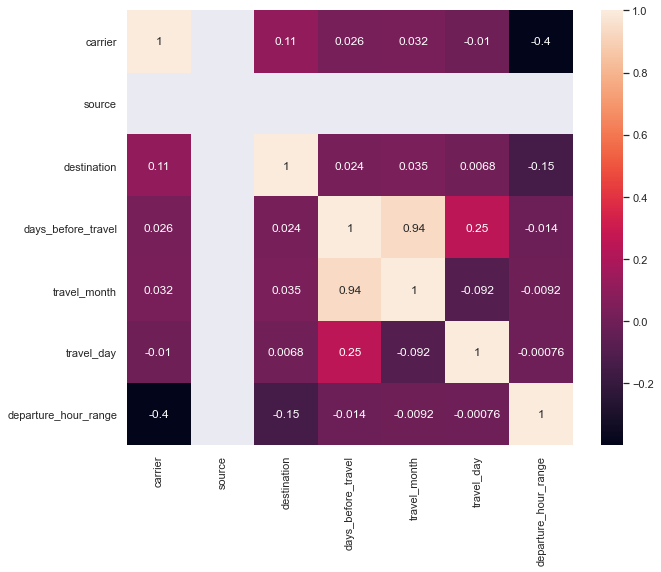

In [399]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [400]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
model = RandomForestRegressor()
model = model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train) * 100
print('Accuracy of Training Set: {:.2f}'.format(train_accuracy))

Accuracy of Training Set: 99.94


[0.46036575 0.         0.03138238 0.00449922 0.48887174 0.00226716
 0.01261375]


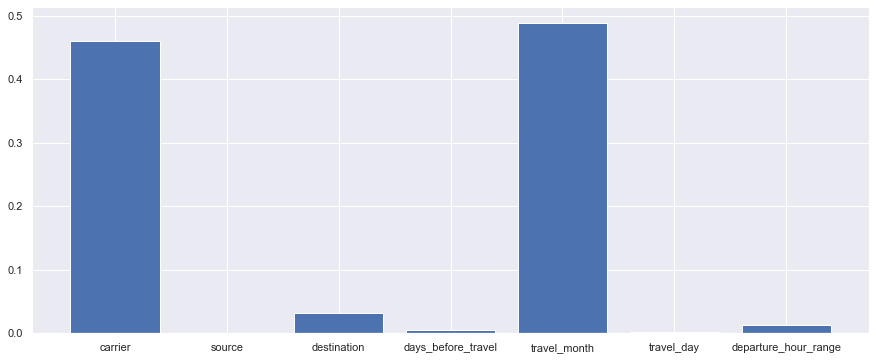

In [401]:
importances = model.feature_importances_
print(importances)
plt.figure(figsize=(15, 6))
importance = model.feature_importances_
plt.bar([x for x in X.columns], importance)
plt.show()

In [402]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred , squared=False))
print(r2_score(y_test, y_pred))

3.090869565217394
10.30731125063134
0.9985519054398232


In [403]:
y_pred = model.predict(X_train)
print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred , squared=False))
print(r2_score(y_train, y_pred))

1.5325529170331278
6.993723588084753
0.9994344647159326


In [404]:
import joblib
joblib.dump(model, 'airfare-MAA-BLR-DEL.pkl')

['airfare-MAA-BLR-DEL.pkl']

In [405]:
"""
{
'Singapore Airlines': 1, 
'IndiGo': 2, 
'Air-India Express': 3, 
'Silkair': 4,
'Air India': 5, 
'Scoot': 6, 
'Vistara': 7
}
{'SIN': 1}
{'MAA': 1, 'BLR': 2, 'DEL': 3}
"""
model = joblib.load('airfare-MAA-BLR-DEL.pkl')

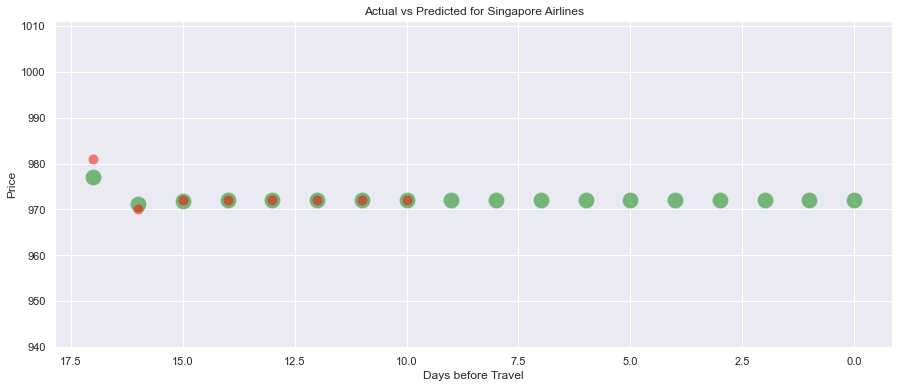

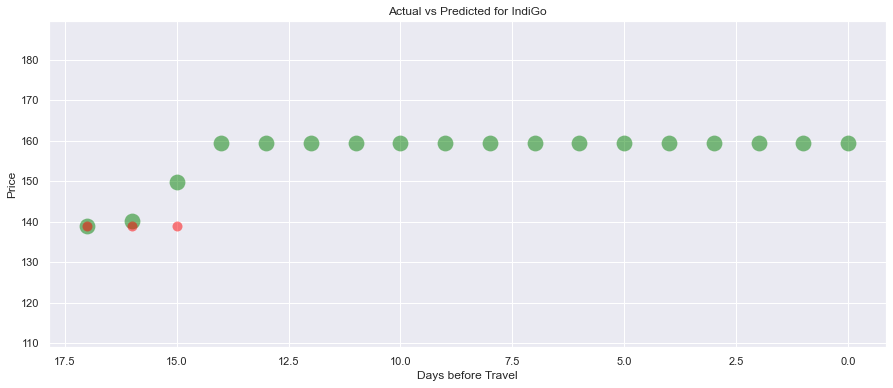

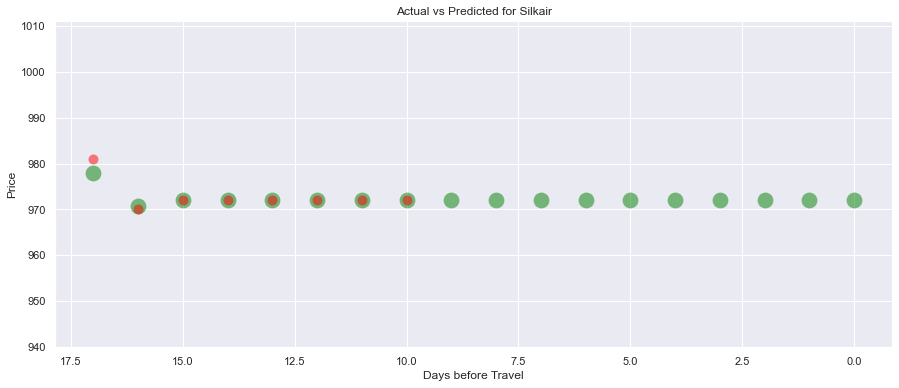

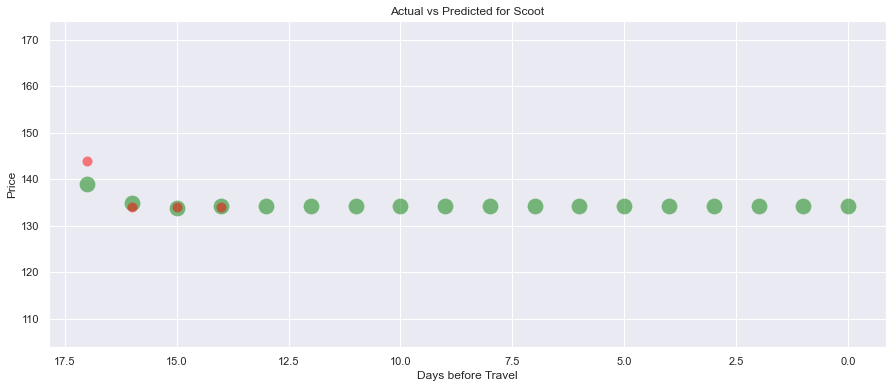

In [406]:
carrmap = {1: 'Singapore Airlines',2: 'IndiGo',3:'Air-India Express',4:'Silkair',5:'Air India',6:'Scoot',7:'Vistara'}
days = 18
carr = [1,2,3,4,5,6]
source = 1
dest = 1
trav_mnth = 5
trav_day = 1
dep_hour_range = [4,2,1,2,2,4]
for i in range(0,len(carr)):
    
    filter_df_ = df_split.copy()
    filter_df_ = filter_df_[(filter_df_['carrier'] == carr[i])]
    filter_df_ = filter_df_[(filter_df_['travel_month'] == trav_mnth) & (filter_df_['destination'] == dest) & (filter_df_['travel_day'] == trav_day)]
    filter_df_ = filter_df_[(filter_df_['departure_hour_range'] == dep_hour_range[i])]
    filter_df_.sort_values(by=['days_before_travel'], inplace=True)
    #print(filter_df_)
    #print("Count {}".format(filter_df_.shape[0]))
    if filter_df_.shape[0] == 0:
        continue
    predict = pd.DataFrame()
    predict['carrier'] = [carr[i] for x in range(0,days)]
    predict['source'] = [source for x in range(0,days)]
    predict['destination'] = [dest for x in range(0,days)]
    predict['days_before_travel'] = [x for x in range(1,days+1)]
    predict['travel_month'] = [trav_mnth for x in range(0,days)]
    predict['travel_day'] = [trav_day for x in range(0,days)]
    predict['departure_hour_range'] = [dep_hour_range[i] for x in range(0,days)]

    pred = model.predict(predict)
    #print(pred)
    act = np.array(filter_df_['price'])
    min_max = np.concatenate((pred, act), axis=0)
    actual = np.pad(act, (days-act.size, 0), 'constant')
    #print(actual)
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.scatter(x = range(0, pred.size), y=pred, c = 'green', label = 'Actual', alpha = 0.5, s=250, 
               linewidth=0, edgecolors='green')
    ax.scatter(x = range(0, actual.size), y=actual, c = 'red', label = 'Predicted', alpha = 0.5, s=100, 
               linewidth=0, edgecolors='red')
    plt.title('Actual vs Predicted for {}'.format(carrmap.get(carr[i])))
    plt.xlabel('Days before Travel')
    plt.ylabel('Price')
    plt.gca().invert_xaxis()
    plt.ylim(min(min_max)-30, max(min_max)+30)
    plt.show()

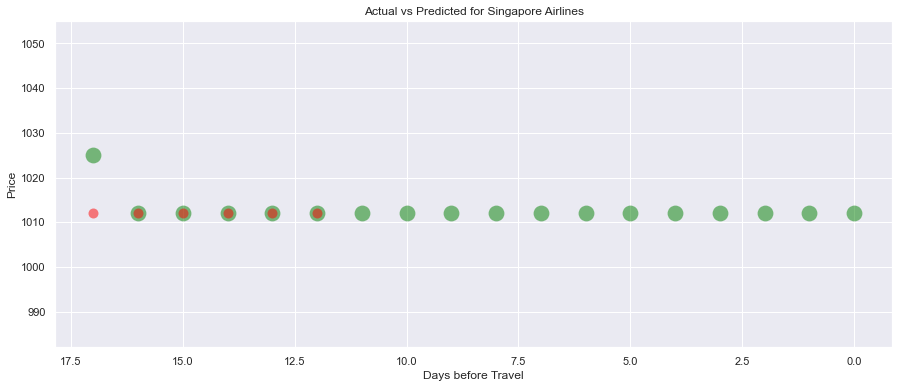

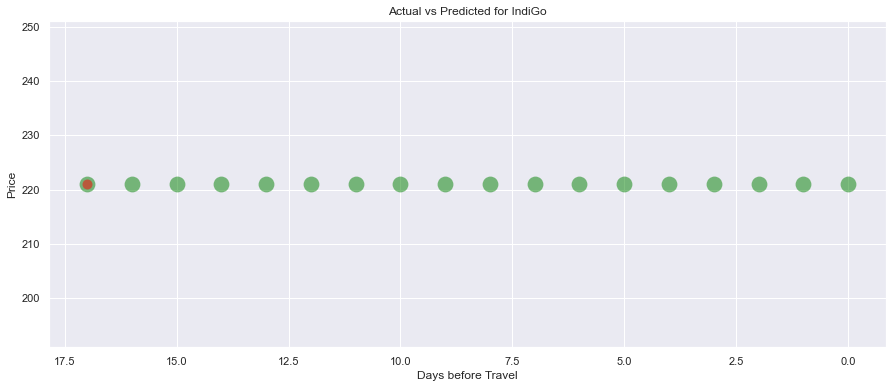

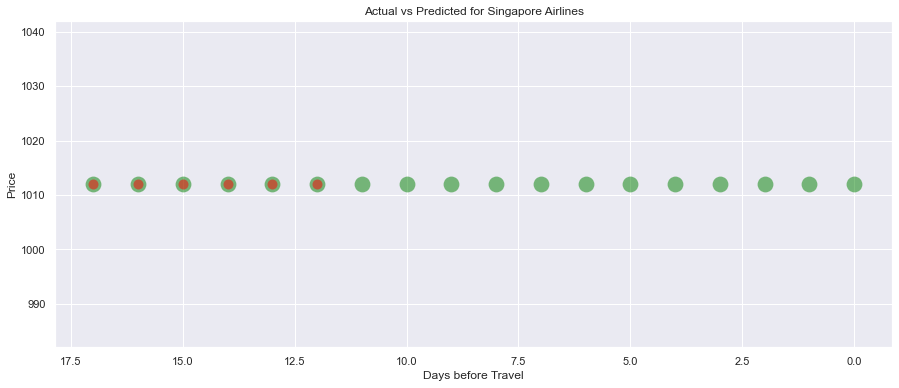

In [407]:
carrmap = {1: 'Singapore Airlines',2: 'IndiGo',5:'Air India',7:'Vistara'}
days = 18
carr = [1,2,1,5,7]
source = 1
dest = 3
trav_mnth = 5
trav_day = 1
dep_hour_range = [3,4,1,2,2]
for i in range(0,len(carr)):
    
    filter_df_ = df_split.copy()
    filter_df_ = filter_df_[(filter_df_['carrier'] == carr[i])]
    filter_df_ = filter_df_[(filter_df_['travel_month'] == trav_mnth) & (filter_df_['destination'] == dest) & (filter_df_['travel_day'] == trav_day)]
    filter_df_ = filter_df_[(filter_df_['departure_hour_range'] == dep_hour_range[i])]
    filter_df_.sort_values(by=['days_before_travel'], inplace=True)
    #print(filter_df_)
    #print("Count {}".format(filter_df_.shape[0]))
    if filter_df_.shape[0] == 0:
        continue

    predict = pd.DataFrame()
    predict['carrier'] = [carr[i] for x in range(0,days)]
    predict['source'] = [source for x in range(0,days)]
    predict['destination'] = [dest for x in range(0,days)]
    predict['days_before_travel'] = [x for x in range(1,days+1)]
    predict['travel_month'] = [trav_mnth for x in range(0,days)]
    predict['travel_day'] = [trav_day for x in range(0,days)]
    predict['departure_hour_range'] = [dep_hour_range[i] for x in range(0,days)]
    #print(predict)
    pred = model.predict(predict)
    #print(pred)
    act = np.array(filter_df_['price'])
    min_max = np.concatenate((pred, act), axis=0)
    actual = np.pad(act, (days-act.size, 0), 'constant')
    #print(actual)
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.scatter(x = range(0, pred.size), y=pred, c = 'green', label = 'Actual', alpha = 0.5, s=250, 
               linewidth=0, edgecolors='green')
    ax.scatter(x = range(0, actual.size), y=actual, c = 'red', label = 'Predicted', alpha = 0.5, s=100, 
               linewidth=0, edgecolors='red')
    plt.title('Actual vs Predicted for {}'.format(carrmap.get(carr[i])))
    plt.xlabel('Days before Travel')
    plt.ylabel('Price')
    plt.gca().invert_xaxis()
    plt.ylim(min(min_max)-30, max(min_max)+30)
    plt.show()

### Appendix

In [376]:
df_query = df_split.copy()
df_query.query('carrier == 1 and destination == 1 and travel_month == 5 and travel_day == 1') 

,carrier,source,destination,days_before_travel,price,travel_month,travel_day,departure_hour_range
3,1,1,1,18.0,981.0,5,1,4
163,1,1,1,17.0,970.0,5,1,4
679,1,1,1,16.0,972.0,5,1,4
1193,1,1,1,15.0,972.0,5,1,4
1707,1,1,1,14.0,972.0,5,1,4
2214,1,1,1,13.0,972.0,5,1,4
2711,1,1,1,12.0,972.0,5,1,4
3208,1,1,1,11.0,972.0,5,1,4


In [377]:
predict['carrier'] = [1 for i in range(1,19)]
predict['source'] = [1 for i in range(1,19)]
predict['destination'] = [1 for i in range(1,19)]
predict['days_before_travel'] = [x for x in range(1,19)]
predict['travel_month'] = [5 for x in range(1,19)]
predict['travel_day'] = [1 for x in range(1,19)]
predict['departure_hour_range'] = [4 for x in range(1,19)]
predict

,carrier,source,destination,days_before_travel,travel_month,travel_day,departure_hour_range
0,1,1,1,1,5,1,4
1,1,1,1,2,5,1,4
2,1,1,1,3,5,1,4
3,1,1,1,4,5,1,4
4,1,1,1,5,5,1,4
5,1,1,1,6,5,1,4
6,1,1,1,7,5,1,4
7,1,1,1,8,5,1,4
8,1,1,1,9,5,1,4
9,1,1,1,10,5,1,4


In [378]:
pred = model.predict(predict)
pred

array([972.  , 972.  , 972.  , 972.  , 972.  , 972.  , 972.  , 972.  ,
       972.  , 972.  , 972.  , 972.  , 972.  , 972.  , 972.  , 971.95,
       970.93, 976.81])

In [379]:
actual = np.array(filter_df_SQ['price'])
actual = np.pad(actual, (18-actual.size, 0), 'constant')
actual

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 972.,
       972., 972., 972., 972., 972., 970., 981.])

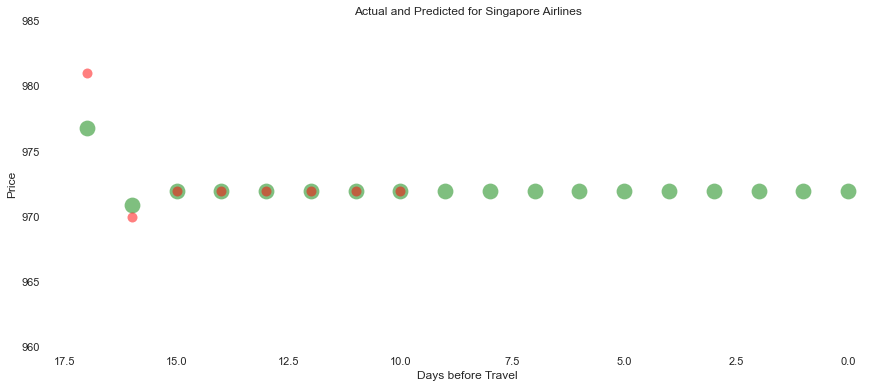

In [380]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x = range(0, pred.size), y=pred, c = 'green', label = 'Actual', alpha = 0.5, s=250, 
           linewidth=0, edgecolors='green')
ax.scatter(x = range(0, actual.size), y=actual, c = 'red', label = 'Predicted', alpha = 0.5, s=100, 
           linewidth=0, edgecolors='red')
plt.title('Actual and Predicted for Singapore Airlines') 
plt.xlabel('Days before Travel')
plt.ylabel('Price')
plt.gca().invert_xaxis()
ax.set_facecolor("white")
plt.ylim(960, 985)
plt.show()